In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn

In [2]:
 def train_model(model, input_data, target_data):
    max_epochs = 2000
    epochs_list, loss_list, grad_norm_list = [], [], []

    for epoch in range(1, max_epochs + 1):
        predictions = model(input_data)
        loss = loss_function(predictions, target_data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epochs_list.append(epoch)
        loss_list.append(loss.detach().numpy())

        grad_norm = sum(torch.norm(param.grad).item()**2 for param in model.parameters() if param.grad is not None)**0.5
        grad_norm_list.append(grad_norm)

        if epoch % 100 == 0:
            print(f'Epoch: {epoch}, Loss: {loss.item():.4f}')

        if epoch > 5 and loss_list[-1] < 0.001:
            if abs(loss_list[-3] - loss_list[-2]) < 1.0e-05 and abs(loss_list[-2] - loss_list[-1]) < 1.0e-05:
                print("Convergence reached for loss:", loss_list[-1])
                break

    return epochs_list, loss_list, predictions, grad_norm_list


In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(1, 4)
        self.layer2 = nn.Linear(4, 9)
        self.layer3 = nn.Linear(9, 12)
        self.layer4 = nn.Linear(12, 10)
        self.layer5 = nn.Linear(10, 10)
        self.layer6 = nn.Linear(10, 10)
        self.layer7 = nn.Linear(10, 4)
        self.layer8 = nn.Linear(4, 1)

    def forward(self, input_tensor):
        input_tensor = nn.functional.leaky_relu(self.layer1(input_tensor))
        input_tensor = nn.functional.leaky_relu(self.layer2(input_tensor))
        input_tensor = nn.functional.leaky_relu(self.layer3(input_tensor))
        input_tensor = nn.functional.leaky_relu(self.layer4(input_tensor))
        input_tensor = nn.functional.leaky_relu(self.layer5(input_tensor))
        input_tensor = nn.functional.leaky_relu(self.layer6(input_tensor))
        input_tensor = nn.functional.leaky_relu(self.layer7(input_tensor))
        output_tensor = self.layer8(input_tensor)

        return output_tensor


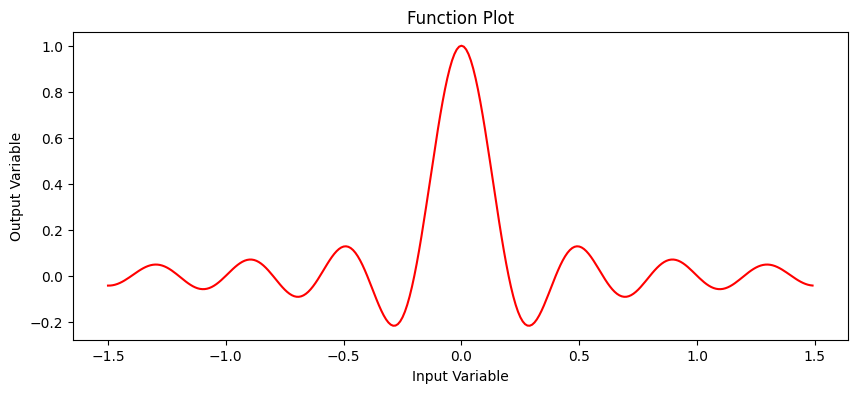

In [4]:
input_data = np.expand_dims(np.arange(-1.5, 1.5, 0.01), 1)
output_data = np.sinc(5 * input_data)

input_tensor, output_tensor = torch.tensor(input_data, dtype=torch.float32), torch.tensor(output_data, dtype=torch.float32)

plt.figure(figsize=(10, 4))
plt.plot(input_tensor.numpy(), output_tensor.numpy(), color="red")
plt.title('Function Plot')
plt.xlabel('Input Variable')
plt.ylabel('Output Variable')
plt.show()


In [5]:
model_1 = NeuralNetwork()
optimizer = torch.optim.Adam(model_1.parameters(), lr=1e-3, weight_decay=1e-4)
loss_function = torch.nn.MSELoss()
total_params = sum(param.numel() for param in model_1.parameters())
print(total_params)
epoch_list, loss_list, predictions, gradient_list = train_model(model_1, input_tensor, output_tensor)


572
Epoch: 100, Loss: 0.0609
Epoch: 200, Loss: 0.0578
Epoch: 300, Loss: 0.0413
Epoch: 400, Loss: 0.0228
Epoch: 500, Loss: 0.0074
Epoch: 600, Loss: 0.0024
Epoch: 700, Loss: 0.0023
Epoch: 800, Loss: 0.0022
Epoch: 900, Loss: 0.0022
Epoch: 1000, Loss: 0.0022
Epoch: 1100, Loss: 0.0022
Epoch: 1200, Loss: 0.0022
Epoch: 1300, Loss: 0.0022
Epoch: 1400, Loss: 0.0022
Epoch: 1500, Loss: 0.0022
Epoch: 1600, Loss: 0.0022
Epoch: 1700, Loss: 0.0022
Epoch: 1800, Loss: 0.0022
Epoch: 1900, Loss: 0.0022
Epoch: 2000, Loss: 0.0022


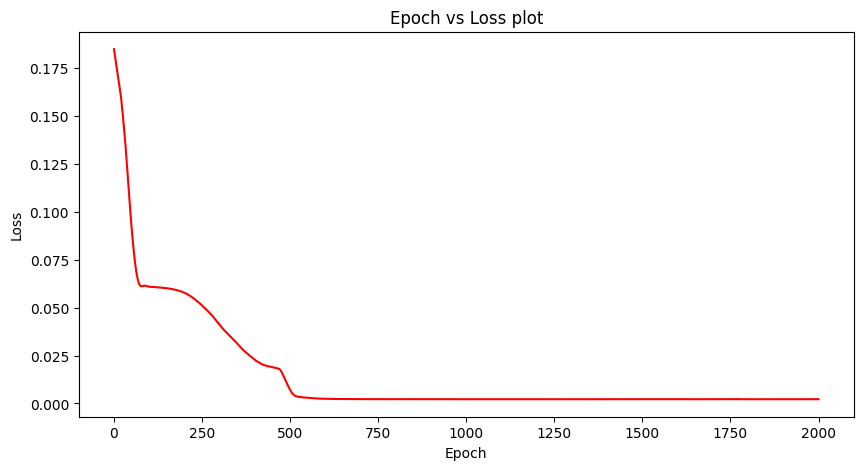

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, loss_list, color="red")
plt.title('Epoch vs Loss plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

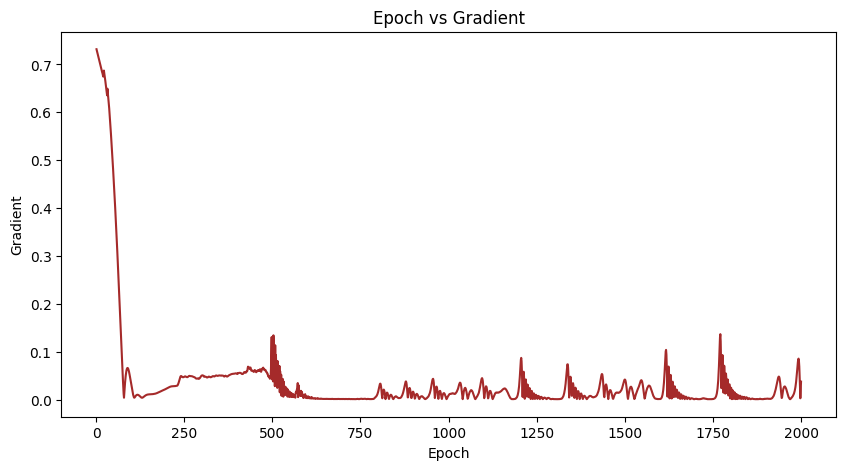

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, gradient_list, color="brown")
plt.title('Epoch vs Gradient')
plt.xlabel('Epoch')
plt.ylabel('Gradient')
plt.show()


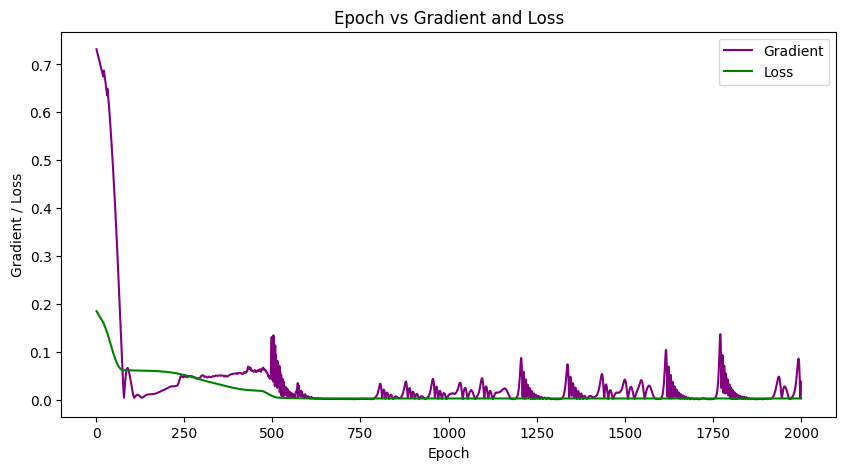

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, gradient_list, color="purple", label="Gradient")
plt.plot(epoch_list, loss_list, color="green", label="Loss")
plt.title('Epoch vs Gradient and Loss')
plt.xlabel('Epoch')
plt.ylabel('Gradient / Loss')
plt.legend()
plt.show()
